In [ ]:
# Description
# Capstone Project: Student Success & Career Path Prediction

# Scenario

# The university wants to analyze student performance data to:

# Predict exam scores (Regression).
# Classify students into “At Risk” vs. “On Track” categories (Classification).
# Cluster students into groups with similar study habits (Clustering).
# Recommend interventions (extra tutoring, workshops, counseling).

In [15]:
import pandas as pd

In [16]:
df=pd.read_csv("Student Success & Career Path  - Sheet1.csv")
df.head()

,Student_ID,Hours_Studied,Attendance (%),Assignments_Submitted,Previous_Sem_GPA,Participation_Score,Final_Exam_Score,Pass_Fail,Career_Readiness_Score,Age,Gender
0,S001,10,85,8,3.2,70,78,Pass,65,20,Female
1,S002,5,60,5,2.5,55,55,Fail,40,21,Male
2,S003,12,90,9,3.8,80,88,Pass,75,22,Female
3,S004,3,40,3,2.0,45,45,Fail,35,19,Male
4,S005,8,75,7,3.0,65,70,Pass,60,23,Female


In [17]:
df.isnull().sum()

Student_ID                0
Hours_Studied             0
Attendance (%)            0
Assignments_Submitted     0
Previous_Sem_GPA          0
Participation_Score       0
Final_Exam_Score          0
Pass_Fail                 0
Career_Readiness_Score    0
Age                       0
Gender                    0
dtype: int64

In [18]:
df = df.drop("Student_ID", axis=1)
df["Gender"] = df["Gender"].map({"Male":1, "Female":0})

In [19]:
X_reg = df.drop(["Final_Exam_Score", "Pass_Fail"], axis=1)
y_reg = df["Final_Exam_Score"]

In [20]:
X_clf = df.drop(["Pass_Fail", "Final_Exam_Score"], axis=1)
y_clf = df["Pass_Fail"]

In [21]:
cluster_features = [
    "Hours_Studied",
    "Attendance (%)",
    "Assignments_Submitted",
    "Participation_Score",
    "Previous_Sem_GPA"
]

X_cluster = df[cluster_features]

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

In [23]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_pred_reg = reg_model.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred_reg))
print("R2:", r2_score(y_test, y_pred_reg))

MAE: 2.0012469477986965
R2: 0.9455693142315348


In [25]:
#Classification
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

          52       0.00      0.00      0.00       0.0
          55       0.00      0.00      0.00       1.0
          75       0.00      0.00      0.00       0.0
          78       0.00      0.00      0.00       1.0
          80       0.00      0.00      0.00       1.0
          82       0.00      0.00      0.00       0.0
          85       0.00      0.00      0.00       1.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



c:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\admin\anaconda3\Lib\site-pa

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

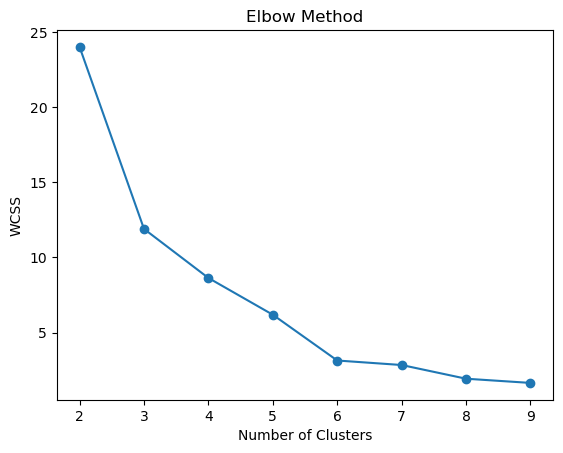

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,10), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [29]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:
df["Predicted_Risk"] = log_model.predict(X_clf)

In [32]:
def recommend(row):
    if row["Predicted_Risk"] == 0 and row["Cluster"] == 0:
        return "Intensive Tutoring + Counseling"
    elif row["Predicted_Risk"] == 0:
        return "Mentoring + Academic Monitoring"
    elif row["Cluster"] == 2:
        return "Advanced Career Workshops"
    else:
        return "Regular Monitoring"

df["Intervention"] = df.apply(recommend, axis=1)

In [33]:
df.head(5)

,Hours_Studied,Attendance (%),Assignments_Submitted,Previous_Sem_GPA,Participation_Score,Final_Exam_Score,Pass_Fail,Career_Readiness_Score,Age,Gender,Cluster,Predicted_Risk,Intervention
0,10,85,8,3.2,70,78,Pass,65,20,0,0,75,Regular Monitoring
1,5,60,5,2.5,55,55,Fail,40,21,1,2,52,Advanced Career Workshops
2,12,90,9,3.8,80,88,Pass,75,22,0,0,88,Regular Monitoring
3,3,40,3,2.0,45,45,Fail,35,19,1,1,45,Regular Monitoring
4,8,75,7,3.0,65,70,Pass,60,23,0,2,70,Advanced Career Workshops
